In [2]:
# Démarrage de l'exercice 3
import visualID as vID
from visualID import color
vID.init()

**Début à:** Monday 06 June 2022, 23:26:20  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./svg/logoBegin.svg" style="margin-left:auto; margin-right:auto"/></p>

### Apprentissage supervisé (*supervised Machine Learning*) appliqué à la classification. Suggestion de petite(s) application(s) en autonomie. Corrigé

#### Importation des librairies utiles

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

#### a. Lecture de la base de données qui ont été adaptées au problème

In [4]:
dfi=pd.read_csv('./iris-data/iris_ohe.csv', sep="\t") #les colonnes sont séparées par des tabulations
print(f"Dfi. Structure (shape) :{dfi.shape}")
display(dfi)

Dfi. Structure (shape) :(150, 8)


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,virginica,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,virginica,0.0,0.0,1.0


#### b. Séparation des données en deux sous-ensembles d'apprentissage et de test

In [5]:
data_train = dfi.sample(frac=0.8, axis='index') # on sélectionne au hasard 80% de l'échantillon
data_test  = dfi.drop(data_train.index) # on sélectionne le reste

x_train = data_train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = data_train[['setosa','versicolor','virginica']]
y_train_species = data_train[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

x_test  = data_test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test  = data_test[['setosa','versicolor','virginica']]
y_test_species = data_test[['species']] #sera utile à la fin pour comparer la prédiction et l'espèce réelle

print('x_train : ',x_train.shape)
display(x_train)
print('y_train : ',y_train.shape,'y_train_species : ',y_train_species.shape)
display(y_train, y_train_species)

x_train :  (120, 4)


,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
149,5.9,3.0,5.1,1.8
3,4.6,3.1,1.5,0.2
98,5.1,2.5,3.0,1.1
137,6.4,3.1,5.5,1.8
...,...,...,...,...
128,6.4,2.8,5.6,2.1
96,5.7,2.9,4.2,1.3
115,6.4,3.2,5.3,2.3
121,5.6,2.8,4.9,2.0


y_train :  (120, 3) y_train_species :  (120, 1)


,setosa,versicolor,virginica
105,0.0,0.0,1.0
149,0.0,0.0,1.0
3,1.0,0.0,0.0
98,0.0,1.0,0.0
137,0.0,0.0,1.0
...,...,...,...
128,0.0,0.0,1.0
96,0.0,1.0,0.0
115,0.0,0.0,1.0
121,0.0,0.0,1.0


,species
105,virginica
149,virginica
3,setosa
98,versicolor
137,virginica
...,...
128,virginica
96,versicolor
115,virginica
121,virginica


#### c. Adaptation des données à la régression logistique par le réseau de neurones

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train.values)
x_trainS = scaler.transform(x_train.values) #returns a numpy array
x_testS = scaler.transform(x_test.values) #returns a numpy array
x_trainD = pd.DataFrame(x_trainS, columns=x_train.columns, index=x_train.index)
x_testD = pd.DataFrame(x_testS, columns=x_test.columns, index=x_test.index)
display(x_trainD.describe().style.format("{0:.2f}").set_caption("Training set après normalisation (avec scikit-learn):"))
display(x_testD.describe().style.format("{0:.2f}").set_caption("Test set after après normalisation (avec scikit-learn):"))
x_train = x_trainS
x_test = x_testS
del x_trainD, x_testD, x_trainS, x_testS

,sepal_length,sepal_width,petal_length,petal_width
count,120.00,120.00,120.00,120.00
mean,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.92,-2.51,-1.71,-1.59
25%,-0.95,-0.57,-1.30,-1.18
50%,0.01,-0.08,0.32,0.19
75%,0.64,0.65,0.70,0.74
max,2.42,3.32,1.76,1.70


,sepal_length,sepal_width,petal_length,petal_width
count,30.00,30.00,30.00,30.00
mean,-0.30,0.25,-0.45,-0.43
std,0.95,1.23,1.11,1.15
min,-1.80,-2.02,-1.54,-1.59
25%,-1.04,-0.75,-1.42,-1.45
50%,-0.47,0.28,-1.33,-1.04
75%,0.25,1.07,0.64,0.74
max,1.69,2.83,1.40,1.56


#### d. Définition du modèle

In [7]:
def get_model(NE): #NE = nombre de neurones d'entrée
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(NE, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

#### e. Apprentissage supervisé du réseau de neurones

In [8]:
vID.chrono_start()
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
print(f"x_train. Structure (shape) : {x_train.shape}")
print(f"x_test. Structure (shape) : {x_test.shape}")
print(f"y_train. Structure (shape) : {y_train.shape}")
print(f"y_test. Structure (shape) : {y_test.shape}")
ANNmodel=get_model( (4,)) # 4 neurones d'entrée
ANNmodel.summary()
vID.chrono_start()
ANNhistory = ANNmodel.fit(x_train,
                    y_train,
                    epochs          = 700,
                    batch_size      = 5,
                    verbose         = 1,
                    validation_data = (x_test, y_test),
                    callbacks=[es])
vID.chrono_show()

x_train. Structure (shape) : (120, 4)
x_test. Structure (shape) : (30, 4)
y_train. Structure (shape) : (120, 3)
y_test. Structure (shape) : (30, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hLayer1 (Dense)              (None, 7)                 35        
_________________________________________________________________
hLayer2 (Dense)              (None, 5)                 40        
_________________________________________________________________
oLayer (Dense)               (None, 3)                 18        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
Epoch 1/700


2022-06-06 23:26:27.868310: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-06 23:26:27.868556: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-06 23:26:27.869168: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.
2022-06-06 23:26:27.979473: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-06 23:26:27.979920: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099940000 Hz


24/24 [==============================] - 1s 31ms/step - loss: 1.0108 - accuracy: 0.4609 - val_loss: 0.7983 - val_accuracy: 0.8667
Epoch 2/700
24/24 [==============================] - 0s 5ms/step - loss: 0.9558 - accuracy: 0.5507 - val_loss: 0.7320 - val_accuracy: 0.8667
Epoch 3/700
24/24 [==============================] - 0s 6ms/step - loss: 0.8628 - accuracy: 0.7135 - val_loss: 0.6596 - val_accuracy: 0.8667
Epoch 4/700
24/24 [==============================] - 0s 6ms/step - loss: 0.8613 - accuracy: 0.5631 - val_loss: 0.5986 - val_accuracy: 0.8667
Epoch 5/700
24/24 [==============================] - 0s 5ms/step - loss: 0.8517 - accuracy: 0.5616 - val_loss: 0.5402 - val_accuracy: 0.8667
Epoch 6/700
24/24 [==============================] - 0s 5ms/step - loss: 0.7805 - accuracy: 0.5879 - val_loss: 0.4911 - val_accuracy: 0.8667
Epoch 7/700
24/24 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6904 - val_loss: 0.4456 - val_accuracy: 0.8667
Epoch 8/700
24/24 [=====

#### f. Évaluation numérique globale

In [9]:
evalANN_on_Train = ANNmodel.evaluate(x_train, y_train, verbose=0)
print(f"{color.GREEN}x_train / loss      : {evalANN_on_Train[0]:5.4f}{color.OFF}")
print(f"{color.GREEN}x_train/ accurracy  : {evalANN_on_Train[1]:5.4f}{color.OFF}")
print()
evalANN_on_Test = ANNmodel.evaluate(x_test, y_test, verbose=0)
print(f"{color.BLUE}x_train / loss      : {evalANN_on_Test[0]:5.4f}{color.OFF}")
print(f"{color.BLUE}x_train/ accurracy  : {evalANN_on_Test[1]:5.4f}{color.OFF}")

x_train / loss      : 0.0514
x_train/ accurracy  : 0.9833

x_train / loss      : 0.0395
x_train/ accurracy  : 1.0000


#### g. Comportement du modèle vis-à-vis de chaque espèce d'iris

In [10]:
usp = dfi['species'].unique()
print(f"{color.BOLD}{color.GREEN}Catégories uniques d'iris :{color.OFF} {usp}")
# cette correspondance élément 0 <-> setosa ; élément 1 <-> versicolor ; élément 2 <-> virginica
# va servir à transformer les probabilités les plus élevées en espèce d'iris

y_train_hat=ANNmodel.predict(x_train)
ytr_hD = pd.DataFrame(y_train_hat, columns=usp, index=y_train.index)
# argmax renvoie l'indice de la valeur maximale selon un axe (0 = ligne / 1 = colonne)
# ça va ici nous renvoyer pour chaque ligne le numéro de la colonne qui contient la plus grande valeur de probabilité
# on convertit maintenant 0, 1 & 2 en espèce d'iris
iris_tr_hat = usp[np.argmax(y_train_hat,axis=1)]
# on ajoute cette colonne au dataframe ytr_hD
ytr_hD['Espèce prédite'] = pd.DataFrame(iris_tr_hat, index=y_train.index)
ytr_hD['Espèce observée'] = pd.DataFrame(y_train_species, index=y_train.index)
print(f"{color.BOLD}{color.BLUE}Test Set{color.OFF}. Comparaison entre espèce prédite et espèce observée")
pd.set_option('display.max_rows', None) #on veut afficher toutes les lignes des DataFrames
pd.options.display.float_format = '{:,.2f}'.format #on formatte les probabilités, sinon c'est illisible
display(ytr_hD)
pd.set_option('display.max_rows', 10) #reset de l'affichage: 5 premières et 5 dernières lignes
pd.options.display.float_format = None #reset de l'affichage: format standard 
diff_Pred_Obs=np.where(ytr_hD['Espèce prédite'] == ytr_hD['Espèce observée'], 0, 1)
print(f"Nombre d'erreurs : {np.sum(diff_Pred_Obs)}")

print()
y_test_hat=ANNmodel.predict(x_test)
ytt_hD = pd.DataFrame(y_test_hat, columns=usp, index=y_test.index)
# argmax renvoie l'indice de la valeur maximale selon un axe (0 = ligne / 1 = colonne)
# ça va ici nous renvoyer pour chaque ligne le numéro de la colonne qui contient la plus grande valeur de probabilité
# on convertit maintenant 0, 1 & 2 en espèce d'iris
iris_tt_hat = usp[np.argmax(y_test_hat,axis=1)]
# on ajoute cette colonne au dataframe ytt_hD
ytt_hD['Espèce prédite'] = pd.DataFrame(iris_tt_hat, index=y_test.index)
ytt_hD['Espèce observée'] = pd.DataFrame(y_test_species, index=y_test.index)
print(f"{color.BOLD}{color.RED}Test Set{color.OFF}. Comparaison entre espèce prédite et espèce observée.")
pd.set_option('display.max_rows', None) #on veut afficher toutes les lignes des DataFrames
pd.options.display.float_format = '{:,.2f}'.format #on formatte les probabilités, sinon c'est illisible
display(ytt_hD)
pd.set_option('display.max_rows', 10) #reset de l'affichage: 5 premières et 5 dernières lignes
pd.options.display.float_format = None #reset de l'affichage: 
diff_Pred_Obs=np.where(ytt_hD['Espèce prédite'] == ytt_hD['Espèce observée'], 0, 1)
print(f"Nombre d'erreurs : {np.sum(diff_Pred_Obs)}")

Catégories uniques d'iris : ['setosa' 'versicolor' 'virginica']
Test Set. Comparaison entre espèce prédite et espèce observée


,setosa,versicolor,virginica,Espèce prédite,Espèce observée
105,0.00,0.00,1.00,virginica,virginica
149,0.00,0.05,0.95,virginica,virginica
3,1.00,0.00,0.00,setosa,setosa
98,0.04,0.96,0.00,versicolor,versicolor
137,0.00,0.04,0.96,virginica,virginica
85,0.01,0.99,0.00,versicolor,versicolor
112,0.00,0.01,0.99,virginica,virginica
131,0.00,0.04,0.96,virginica,virginica
90,0.00,0.97,0.03,versicolor,versicolor
34,1.00,0.00,0.00,setosa,setosa


Nombre d'erreurs : 2

Test Set. Comparaison entre espèce prédite et espèce observée.


,setosa,versicolor,virginica,Espèce prédite,Espèce observée
0,1.00,0.00,0.00,setosa,setosa
7,1.00,0.00,0.00,setosa,setosa
9,1.00,0.00,0.00,setosa,setosa
10,1.00,0.00,0.00,setosa,setosa
12,1.00,0.00,0.00,setosa,setosa
18,1.00,0.00,0.00,setosa,setosa
28,1.00,0.00,0.00,setosa,setosa
29,1.00,0.00,0.00,setosa,setosa
31,1.00,0.00,0.00,setosa,setosa
32,1.00,0.00,0.00,setosa,setosa


Nombre d'erreurs : 0


#### h. Bilan de la performance du modèle prédictif sous forme de matrice de confusion

Training set. Matrice de confusion


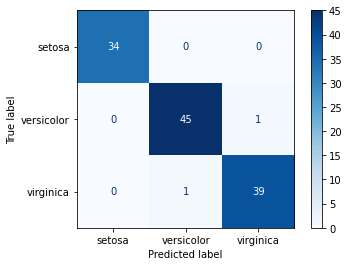

Test set. Matrice de confusion


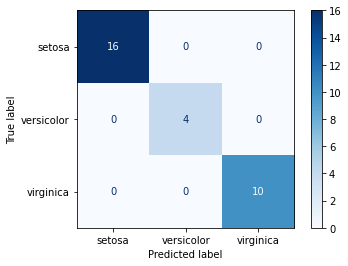

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_labels = dfi['species'].unique()
print("Training set. Matrice de confusion")
cm_tr = confusion_matrix(np.argmax(y_train.to_numpy(),axis=1), np.argmax(y_train_hat,axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tr, display_labels=cm_labels)
disp.plot(cmap=plt.cm.Blues) #ici cm = diminutif de colormap dans matplotlib
plt.show()
print("Test set. Matrice de confusion")
cm_tt = confusion_matrix(np.argmax(y_test.to_numpy(),axis=1), np.argmax(y_test_hat,axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tt, display_labels=cm_labels)
disp.plot(cmap=plt.cm.Blues) #ici cm = diminutif de colormap dans matplotlib
plt.show()

In [12]:
vID.end()

**Fin à:** Monday 06 June 2022, 23:26:50  
**Durée:** 00:00:30 214ms

<p style="text-align: center"><img width="800px" src="./svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>